In [2]:
##### from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import time
import sys
from datetime import datetime
from datetime import date

In [4]:
def getAndParseURL(url):
    result = requests.get(url,headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 Edg/114.0.0.0"})
    soup = bts(result.text, 'html.parser')
    return soup

In [6]:
PAGE_NUM = []
def find_page_num():

    html = getAndParseURL("https://www.properstar.com/tunisia/buy/apartment-house")
    for i in range(1,75):
        PAGE_NUM.append("https://www.properstar.com/tunisia/buy/apartment-house" + "?p=" + str(i))
    return PAGE_NUM
find_page_num()

['https://www.properstar.com/tunisia/buy/apartment-house?p=1',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=2',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=3',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=4',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=5',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=6',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=7',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=8',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=9',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=10',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=11',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=12',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=13',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=14',
 'https://www.properstar.com/tunisia/buy/apartment-house?p=15',
 'https://www.properstar.com/tunisia/buy/apartmen

In [8]:
import requests
from bs4 import BeautifulSoup as bts
import re
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.edge.service import Service

# Function to extract data from multiple URLs using Selenium
def all_coordinations(urls):
    # Path to your Edge WebDriver
    edge_driver_path = "C:\\Users\\moham\\Desktop\\edgedriver_win64\\msedgedriver.exe"

    # Set up Selenium
    service = Service(executable_path=edge_driver_path)
    driver = webdriver.Edge(service=service)

    # Data containers
    all_p_tags = []
    all_price_tags = []
    all_location_tags = []

    for url in urls:
        # Open the URL
        driver.get(url)

        # Scroll down the page to load all content
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(5)  # Wait for content to load

        # Simulate a small random interaction (like moving the mouse)
        action = ActionChains(driver)
        action.move_by_offset(5, 5).perform()

        # Wait for the page to load fully
        time.sleep(5)  # Adjust the sleep time if needed

        # Get the page source
        page_source = driver.page_source
        soup = bts(page_source, 'html.parser')

        # Find all relevant tags on the page
        all_p_tags.extend(soup.find_all('p', class_='item-highlights'))
        all_price_tags.extend(soup.find_all('div', class_='listing-price-main'))
        all_location_tags.extend(soup.find_all('div', class_='item-location'))

    # Close the browser
    driver.quit()
    
    return all_p_tags, all_price_tags, all_location_tags

ModuleNotFoundError: No module named 'selenium'

In [21]:
import pandas as pd
import re
#html = getAndParseURL("https://www.zingat.com/dumlupinar-mah-de-genc-binada-genis-3-1-satilik-daire-4978221i")

# Function to extract data and compile it into a DataFrame
def extract_data():
    urls = find_page_num()  # Get list of URLs to scrape
    p_tags, price_tags, location_tags = all_coordinations(urls)

    # Data lists
    residences = []
    num_rooms = []
    num_beds = []
    num_baths = []
    space_area = []
    prices = []
    locations = []

    for p_tag, price_tag, location_tag in zip(p_tags, price_tags, location_tags):
        text = p_tag.get_text()
        price_text = price_tag.get_text()  # Extract text from the price tag
        location_text = location_tag.get_text()  # Extract location from the location tag

        # Regex patterns
        residence_pattern = r'(House|Apartment|Villa|Duplex)'
        rooms_pattern = r'(\d+) room'
        beds_pattern = r'(\d+) bed'
        baths_pattern = r'(\d+) bath'
        area_pattern = r'(\d+\s*m²)'
        price_pattern = r'\$([\d,]+)'  # Pattern to extract the price (e.g., $83,194)

        # Extracting data using regex
        residence = re.search(residence_pattern, text)
        rooms = re.search(rooms_pattern, text)
        beds = re.search(beds_pattern, text)
        baths = re.search(baths_pattern, text)
        area = re.search(area_pattern, text)
        price = re.search(price_pattern, price_text)

        # Appending extracted data to lists (using None if the data is missing)
        residences.append(residence.group(1) if residence else None)
        num_rooms.append(rooms.group(1) if rooms else None)
        num_beds.append(beds.group(1) if beds else None)
        num_baths.append(baths.group(1) if baths else None)
        space_area.append(area.group(1) if area else None)
        prices.append(price.group(1) if price else None)  # Append extracted price
        locations.append(location_text.strip() if location_text else None)  # Append extracted location

    # Create a DataFrame
    df = pd.DataFrame({
        'Residence': residences,
        'Number of Rooms': num_rooms,
        'Number of Beds': num_beds,
        'Number of Bathrooms': num_baths,
        'Space Area': space_area,
        'Price': prices,
        'Location': locations
    })

    return df

# Display the DataFrame
dataframe = extract_data()
print(dataframe)

     Residence Number of Rooms Number of Beds Number of Bathrooms Space Area  \
0    Apartment            None           None                None       None   
1        Villa               7              5                   4     600 m²   
2    Apartment               4              3                   1     102 m²   
3    Apartment               3           None                None      78 m²   
4    Apartment               4              3                   1     119 m²   
..         ...             ...            ...                 ...        ...   
212  Apartment               2           None                None      71 m²   
213  Apartment               2           None                None       None   
214  Apartment            None           None                None       None   
215       None               7           None                None      58 m²   
216      House               5           None                None     300 m²   

       Price       Location  
0     69,

In [ ]:
"""html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()[2]"""


Container <div> not found.


In [1]:
# Assuming the unnamed column is the first column
dataframe = dataframe.rename(columns={dataframe.columns[0]: 'id'})

NameError: name 'dataframe' is not defined

In [22]:
dataframe

,Residence,Number of Rooms,Number of Beds,Number of Bathrooms,Space Area,Price,Location
0,Apartment,None,None,None,None,"69,209",Soukra
1,Villa,7,5,4,600 m²,None,Tunis
2,Apartment,4,3,1,102 m²,None,La Marsa
3,Apartment,3,None,None,78 m²,"93,579",Tabarka
4,Apartment,4,3,1,119 m²,"110,106",La Goulette
...,...,...,...,...,...,...,...
212,Apartment,2,None,None,71 m²,"88,085",Gammarth
213,Apartment,2,None,None,None,"135,273",Nabeul‎
214,Apartment,None,None,None,None,"323,815",Hammamet
215,None,7,None,None,58 m²,"179,315",Bir Bou Rekba


In [42]:
PAGE_NUM=find_page_num()
len(PAGE_NUM)

72

In [23]:
dataframe.to_csv("house_price_prediction_test.csv", encoding="utf-8")

In [45]:
dataframe["Location"].unique()

array(['Djerba Midoun', 'Ghizen', 'Hammamet', 'Ariana', 'Monastir',
       'Sousse', 'Tunis', 'Hergla', 'Houmt Souk', 'Kairouan', 'Mrezga',
       'Mégrine', 'Manouba', 'El Jem',
       'Carthage, V89R+VHP, Carthage, Tunisia', 'Mornag', 'Hammamet Sud',
       'El Kram', 'Manzil Tamim', 'Raoued', 'Akouda', 'El Kantaoui',
       'Chott Meriam', 'Arkou', 'Borj Cédria, Tunisia', 'Mahdia', 'Korba',
       'Gammarth', 'La Marsa', 'Soukra', 'Yasmine Hammamet', 'Mezraia',
       'Tozeur', 'Kelibia', 'Omrane Superieur', 'Ennasr 1', 'Ezzahra',
       'Nabeul\u200e', 'Hammam Sousse', 'El Bahr El Azrak',
       'Bizerte North', 'Ksour Essaf', 'Mellita', 'Sidi Abdelhamid',
       'El Mourouj', 'Djerba Ajim', 'Carthage', 'Médenine Governorate',
       'Bardo', 'Tabarka', 'Aghir', 'Chebba', 'Taieb Mhiri', 'Khazroun',
       'Ben Arous', 'Fatou', 'Djerba Midun', 'Sousse Riad', 'Rades',
       "Carthage, Bd de l'Environnement", 'Sayada', 'Bizerte South',
       'Mnihla', 'Taourit', 'Masakin', 'Hammam-L

In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Residence            328 non-null    object
 1   Number of Rooms      316 non-null    object
 2   Number of Beds       250 non-null    object
 3   Number of Bathrooms  232 non-null    object
 4   Space Area           344 non-null    object
 5   Price                332 non-null    object
 6   Location             360 non-null    object
dtypes: object(7)
memory usage: 19.8+ KB


### Data Preview


In [11]:

import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=pd.read_csv('C:/Users/wejde\OneDrive/Bureau/house_price_prediction.csv')
print(df.head()) 

   Unnamed: 0 Residence  Number of Rooms  Number of Beds  Number of Bathrooms  \
0           0     House              4.0             3.0                  1.0   
1           1     Villa              6.0             4.0                  5.0   
2           2     House              5.0             4.0                  NaN   
3           3     House              5.0             4.0                  NaN   
4           4     House              4.0             2.0                  2.0   

  Space Area    Price       Location  
0      78 m²   83,312  Djerba Midoun  
1     943 m²  880,846         Mrezga  
2     120 m²  144,092  Djerba Midoun  
3     230 m²  347,184  Djerba Midoun  
4     120 m²  166,623  Djerba Midoun  


<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\wejde\AppData\Local\Temp\ipykernel_13604\3155705770.py:1: SyntaxWarning: invalid escape sequence '\O'
  df=pd.read_csv('C:/Users/wejde\OneDrive/Bureau/house_price_prediction.csv')


In [15]:
data_shape = df.shape
print("Number of columns: "+ str(data_shape[1]))
print("Number of rows: "+ str(data_shape[0]))


Number of columns: 8
Number of rows: 1519


la base de données est composée de 1519 observations et de 7 variables + un ID

In [18]:
df.columns

Index(['Unnamed: 0', 'Residence', 'Number of Rooms', 'Number of Beds',
       'Number of Bathrooms', 'Space Area', 'Price', 'Location'],
      dtype='object')

La variable d'intéret est 'Price' et les variables déterministes sont 'Residence', 'Number of Rooms', 'Number of Beds', 'Number of Bathrooms','Space Area', 'Location'


In [21]:
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.dtypes

#suppression de la colonne ID puisque ce n'est pas nécessaire pour la prédiction
df.drop("ID", axis = 1, inplace = True)

In [23]:
#la commande .describe() donne les statistiques descriptives des variables numériques
df.describe()


,Number of Rooms,Number of Beds,Number of Bathrooms
count,1326.000000,589.000000,537.000000
mean,4.728507,3.254669,2.154562
std,2.596116,1.768873,1.386348
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,4.000000,3.000000,2.000000
75%,6.000000,4.000000,3.000000
max,20.000000,12.000000,9.000000


On obtient les statistiques des variables number of rooms, number of beds et number of bathrooms.
On note que le nombre de chambre varie entre 1 et 20, le nombre de lits entre 1 et 12 et le nombre de salle de bain est compris entre 1 et 9.
On note également qu'il existe des valeurs manquantes dans ces variables vu que 'count' est différent de 1519 qui est le nombre de lignes dans cette base.


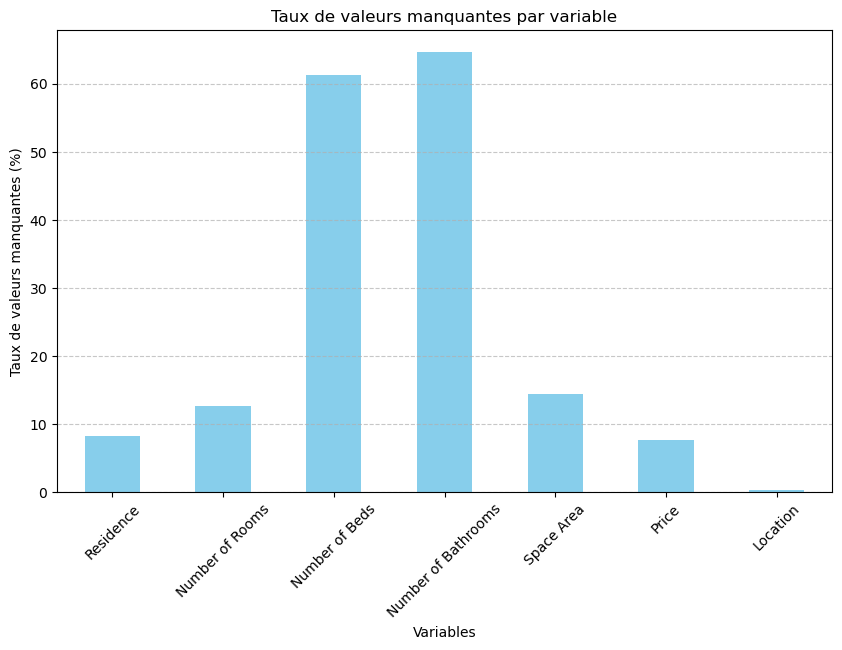

In [26]:
# Calcul du taux de valeurs manquantes par variable
missing_rate = df.isnull().mean() * 100
# Tracer le diagramme à barres
plt.figure(figsize=(10, 6))
missing_rate.plot(kind='bar', color='skyblue')
plt.title('Taux de valeurs manquantes par variable')
plt.xlabel('Variables')
plt.ylabel('Taux de valeurs manquantes (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En analysant ce diagramme à bar, on note que pour les variables Number of beds et number of bathrooms il y a plus de 60% de données manquantes,
alors que pour les autres variables les taux sont inférieurs à 20%.
Ces données manquantes seront remplacées dans la partie Data Cleaning.

### Data Cleaning

On va convertir le type de quelques variables : 
- pour la surface on élimine 'm^2' des modalités de cette variable et on la transforme en vaiable numérique
- pour le Price, on le transforme en numérique

In [32]:
df['Space Area'] = df['Space Area'].str.replace(r'[^\d]', '', regex=True).astype(float)

df['Price'] = df['Price'].str.replace(',', '')
#convertir en numérique
df['Price'] = pd.to_numeric(df['Price'])


Maintenant, on a les bons types de variables, on passe au remplacement des valeurs manquantes. On procède comme suit :
- Les nan dans les varibles numériques seront remplacés par la moyenne de chaque variable
- les nan dans les vraibles catégoriques (Residence et Location) seront remplacés par le mode çad la modalité la plus fréquente pour chaque variable.

In [35]:
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical columns
        df[col].fillna(df[col].mean(), inplace=True)
        
stat=df.describe()
print(stat)

       Number of Rooms  Number of Beds  Number of Bathrooms     Space Area  \
count      1519.000000     1519.000000          1519.000000    1519.000000   
mean          4.728507        3.254669             2.154562     969.041538   
std           2.425472        1.100904             0.823794   14009.922542   
min           1.000000        1.000000             1.000000       1.000000   
25%           3.000000        3.000000             2.154562     107.500000   
50%           4.000000        3.254669             2.154562     200.000000   
75%           5.000000        3.254669             2.154562     600.000000   
max          20.000000       12.000000             9.000000  385000.000000   

              Price  
count  1.519000e+03  
mean   2.735522e+05  
std    3.520803e+05  
min    4.880000e+02  
25%    1.080610e+05  
50%    1.828560e+05  
75%    2.831290e+05  
max    5.190697e+06  


C:\Users\wejde\AppData\Local\Temp\ipykernel_13604\2331107695.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\wejde\AppData\Local\Temp\ipykernel_13604\2331107695.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

On n'a plus de valeurs manquantes mais on voit bien que pour les variables Space Area et Price le max est très grand par rapport aux autres quantiles.
on note qu'il existent des outliers (valeurs aberrantes) au niveau de ces variables. on s'assure de ça avec le boxplot :

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa689c54f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa688a7c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa689fbd10>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa688a7e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa688a7e60>],
 'means': []}

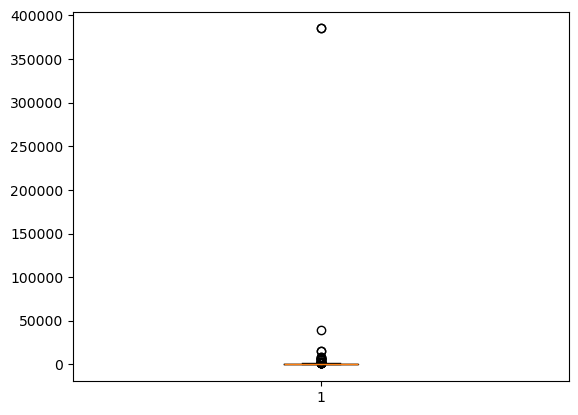

In [38]:
plt.boxplot(df['Space Area'])

Il existe donc des outliers (valeurs aberrantes) qui peuvent biasier les résultats, il faut donc les éliminer en se basant sur le critère d'interquartile.


De meme pour la variable Price :

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa690c7ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa69104470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa690c7bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa691046e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa69104950>],
 'means': []}

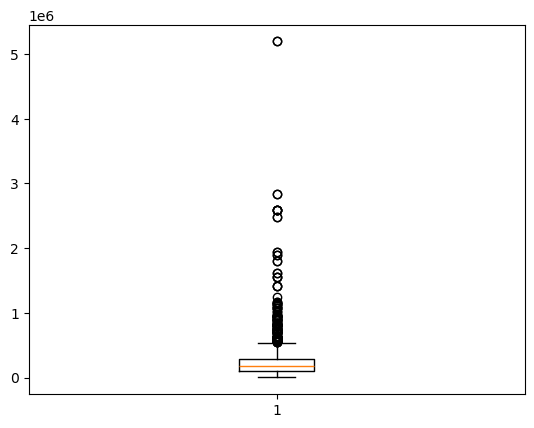

In [42]:
plt.boxplot(df['Price'])

In [44]:
# Calcul des quartiles
Q1 = df['Space Area'].quantile(0.25)
Q3 = df['Space Area'].quantile(0.75)
IQR = Q3 - Q1

# Seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détection des outliers
outliers_iqr = df[(df['Space Area'] < lower_bound) | (df['Space Area'] > upper_bound)]
print("\nOutliers détectés avec l'IQR :")
print(outliers_iqr)


Outliers détectés avec l'IQR :
      Residence  Number of Rooms  Number of Beds  Number of Bathrooms  \
37        Villa         9.000000        6.000000             5.000000   
57        Villa         7.000000        6.000000             4.000000   
148   Apartment        10.000000        5.000000             3.000000   
190       Villa         8.000000        7.000000             6.000000   
207   Apartment        12.000000        9.000000             5.000000   
225       Villa         4.728507        3.254669             2.154562   
308       Villa         6.000000        3.000000             2.000000   
358       Villa         6.000000        3.254669             2.154562   
569       Villa        11.000000        8.000000             2.154562   
577       Villa        17.000000        8.000000             4.000000   
587       Villa         7.000000        5.000000             5.000000   
623   Apartment        12.000000        3.254669             2.154562   
633   Apartment    

on a 32 observations considérées comme aberrantes pour la variable Space Area, on les supprime.

In [49]:
# Suppression des outliers détectés par l'IQR
df= df[(df['Space Area'] >= lower_bound) & (df['Space Area'] <= upper_bound)]

In [51]:

Q1P = df['Price'].quantile(0.25)
Q3P = df['Price'].quantile(0.75)
IQRP = Q3P - Q1P

# Seuils
lower_boundP = Q1P - 1.5 * IQRP
upper_boundP = Q3P + 1.5 * IQRP

# Détection des outliers
outliers_iqrP = df[(df['Price'] < lower_boundP) | (df['Price'] > upper_boundP)]
print("\nOutliers détectés avec l'IQR :")
print(outliers_iqrP)

df= df[(df['Price'] >= lower_boundP) & (df['Price'] <= upper_boundP)]


Outliers détectés avec l'IQR :
      Residence  Number of Rooms  Number of Beds  Number of Bathrooms  \
1         Villa              6.0        4.000000             5.000000   
30        Villa              7.0        4.000000             3.000000   
34    Apartment              5.0        3.254669             2.154562   
45        Villa              5.0        4.000000             3.000000   
61    Apartment              5.0        4.000000             2.154562   
...         ...              ...             ...                  ...   
1488      House              7.0        3.254669             2.154562   
1489      Villa              6.0        3.254669             2.154562   
1507      Villa              6.0        3.254669             2.154562   
1508  Apartment             10.0        3.254669             2.154562   
1517      Villa             10.0        3.254669             2.154562   

      Space Area      Price                               Location  
1          943.0   880

De meme, il y a 130 observations considérées comme aberrantes pour la variable d'intéret. Après suppression on a gardé 1357 lignes.


### Feature Engineering 

In [55]:
#Ajout des caractéristiques qui pourraient mieux capter la relation avec le prix comme la densité de l'espace, le rapport entre chambre et lits
df['Density'] = df['Space Area'] / df['Number of Rooms']
df['Bed_to_Bath_Ratio'] = df['Number of Beds'] / df['Number of Bathrooms']

### Data visualisation 

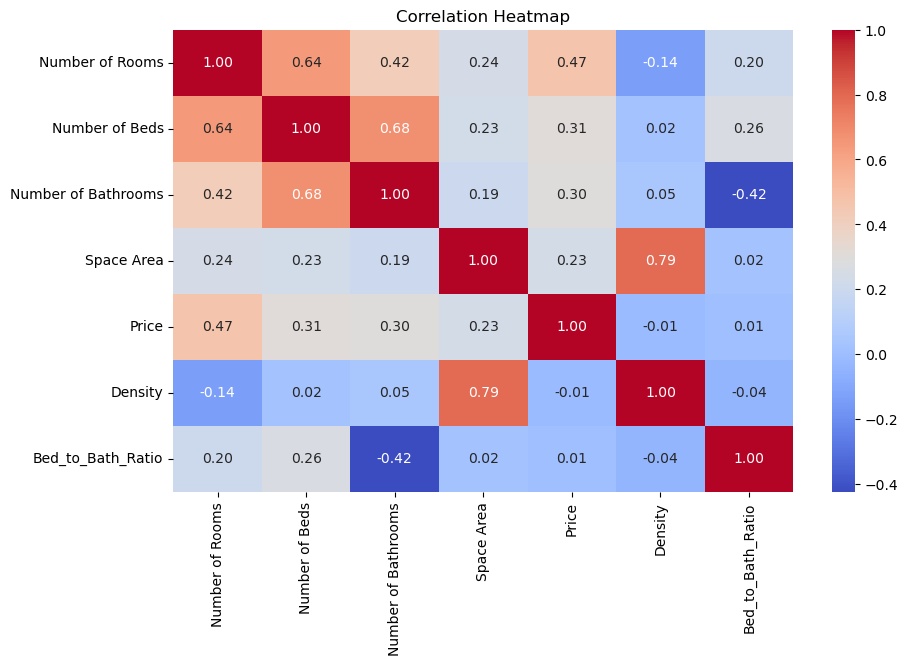

In [58]:
#Corrélation entre les variables numériques
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

En observant le heatmap, on note que :
- Il existe une corrélation de 68% entre le nombre de lits et le nombre de salles de bain et une corrélation de 64% entre le nombre de lits et le nombre de chambres.
Ce résultat est intuitive puisque les chambres sont équipés par des lits et donc plus il y a des chambres, plus il y a aura des lits et un besoin de plus de salles de bain.
- La densité dépend de la surface.
- Le prix n'est pas fortement corrélé avec ces variables numériques.


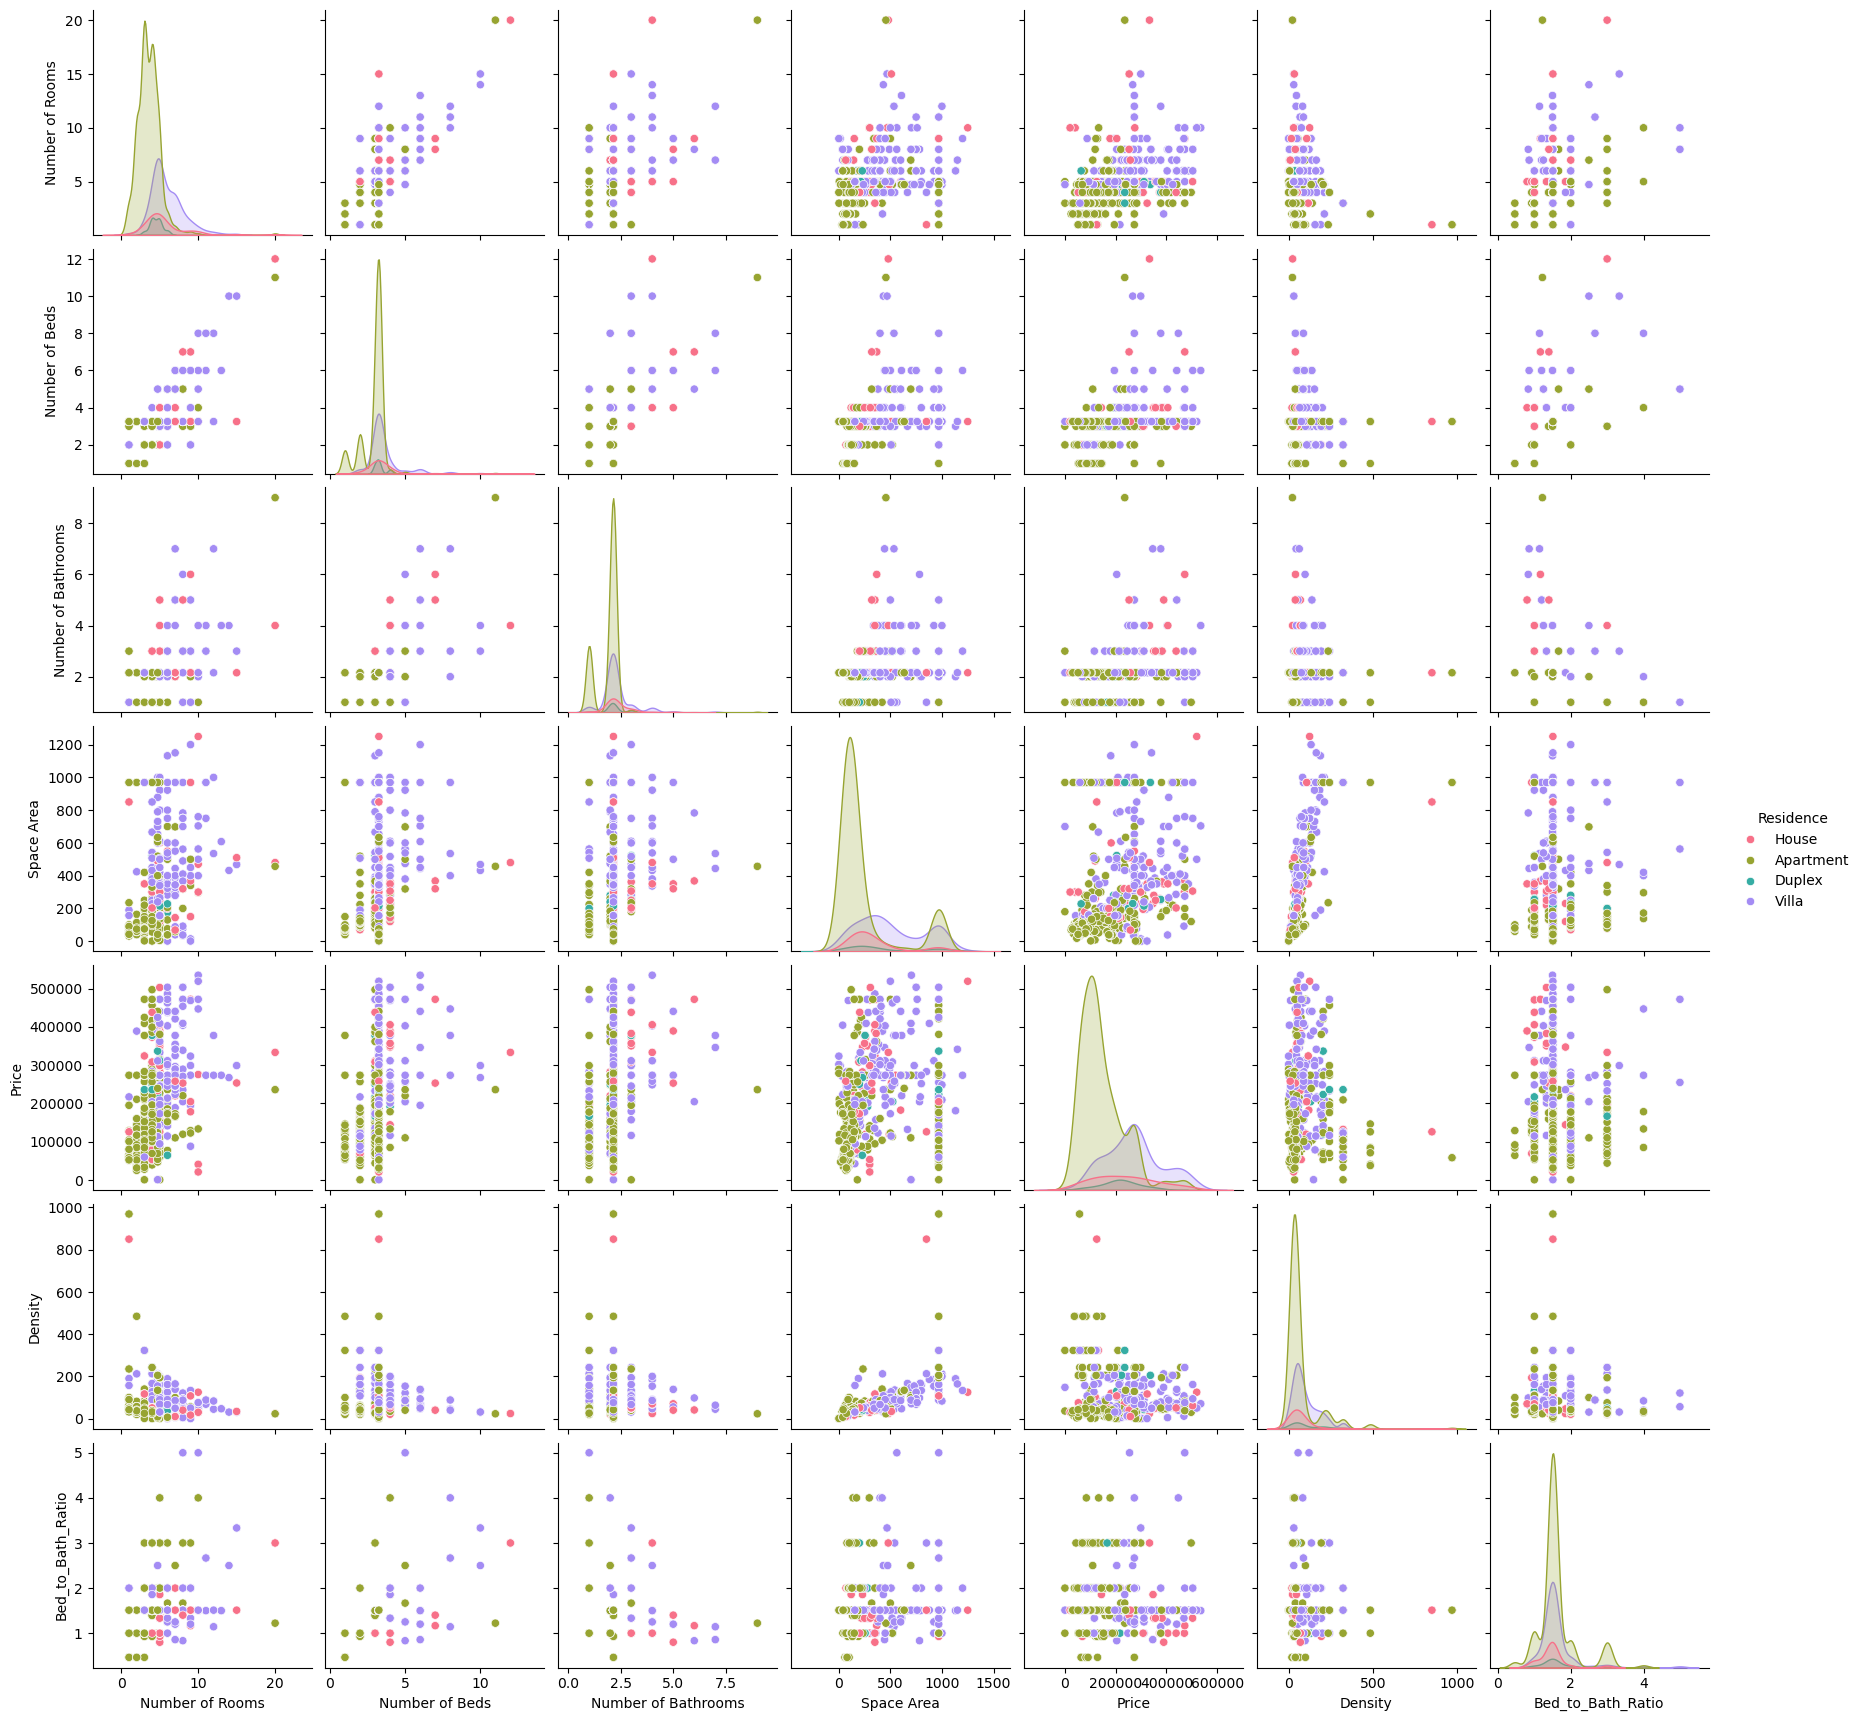

In [61]:
#Pair plot pour explorer les relations
sns.pairplot(df, hue='Residence', palette='husl')
plt.show()

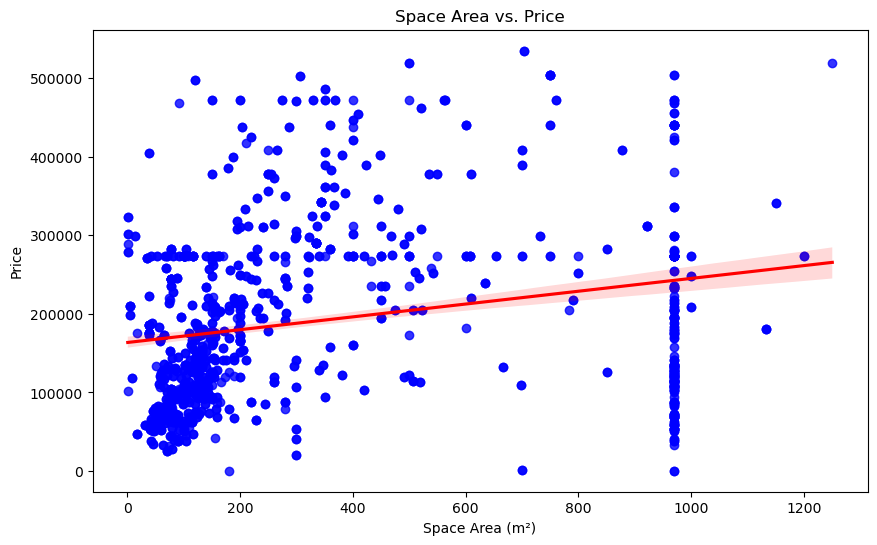

In [63]:
#Scatter Plot avec ligne de régression:  Price=f(Space Area)
plt.figure(figsize=(10, 6))
sns.regplot(x='Space Area', y='Price', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Space Area vs. Price")
plt.xlabel("Space Area (m²)")
plt.ylabel("Price")
plt.show()

### Modelling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
# Encodage des variables catégorielles
le_residence = LabelEncoder()
df['Residence'] = le_residence.fit_transform(df['Residence'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

In [70]:

#Sélection des features et de la target
X = df.drop('Price', axis=1)
y = df['Price']
#Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Régression Linéaire

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("\nÉvaluation du Modèle de Régression Linéaire :")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")
print(f"R² : {r2_score(y_test, y_pred):.2f}")


Évaluation du Modèle de Régression Linéaire :
Mean Absolute Error (MAE) : 71033.98
Mean Squared Error (MSE) : 8408783801.65
Root Mean Squared Error (RMSE) : 91699.42
R² : 0.24


#### Arbres de Décision

In [77]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f}")
print(f"R² : {r2_score(y_test, y_pred_dt):.2f}")

Decision Tree MAE: 45101.08
Decision Tree MSE: 7031440042.48
Decision Tree RMSE: 83853.68
R² : 0.37


#### Forets Aléatoires

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor( random_state=42)
rf_model.fit(X_train, y_train)

#prediction
y_pred_rf = rf_model.predict(X_test)

#Evaluation
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R² : {r2_score(y_test, y_pred_rf):.2f}")

Random Forest MAE: 43393.62
Random Forest MSE: 3850844302.39
Random Forest RMSE: 62055.17
R² : 0.65


D'après ces résultats, on remaque que : 
- la régression linéaire a des performances très limitées, car elle ne peut pas capturer les relations complexes.
- Le R² plus élevé obtenu avec le Random Forest indique que ce modèle s'adapte mieux aux données que la régression linéaire.
- Le Random Forest utilise plusieurs arbres et une méthode d'agrégation, ce qui réduit le risque de surapprentissage (overfitting) par rapport à un arbre de décision unique.


Pistes d'améliration des performances du modèle : 
- Ajout de plus de données : ceci permet au modèle d'avoir une meilleure compréhension des tendances sous-jacentes et améliore la capacité du modèle à généraliser sur de nouvelles données.
- Optimisation des hyperparamètres du modèle de Random Forest (n_estimators, max_depth, min_samples_split, etc.).
